# SCN general aspect figure

This notebook generates the graph for the SCN general aspect figure

In [4]:
import paths

In [46]:
import networkx as nx
import matplotlib.pyplot as plt
from caryocar.models import SpeciesCollectorsNetwork

%matplotlib inline

In [131]:
records = [
    (['col1','col2','col3'], 'sp1'),
    (['col1','col2','col3'], 'sp2'),
    (['col1','col2','col3'], 'sp3'),
    (['col1','col2'], 'sp4'),
    (['col1'], 'sp4'),
    (['col1','col3'], 'sp5'),
    (['col3','col2'], 'sp6'),
    (['col3'],'sp2'),
    (['col4'],'sp4'),
    (['col4'],'sp7'),
    (['col4'],'sp7'),
    (['col4'],'sp7'),
    (['col4'],'sp7'),
    (['col4'],'sp8'),
    (['col3'],'sp9'),
    (['col3'],'sp9'),
    (['col3'],'sp9'),
    (['col5'],'sp4'),
    (['col5'],'sp4'),
    (['col5'],'sp4'),
    (['col5'],'sp10')
    
    
    
]

cols,spp = list(zip(*records))

In [132]:
scn = SpeciesCollectorsNetwork(species=spp,collectors=cols)

#### SCN general

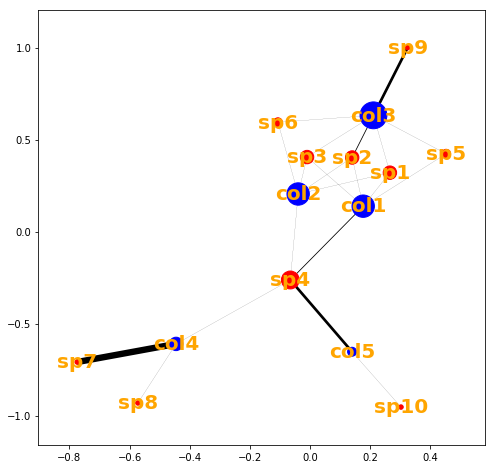

In [151]:
plt.figure(figsize=(8,8))

nodes = scn.nodes(data='bipartite')

pos = nx.layout.spring_layout(scn,iterations=1000)
nx.draw_networkx_nodes(scn,pos, nodelist=[ n[0] for n in nodes], 
                                node_color=['b' if n[1]==0 else 'r' for n in nodes],
                                node_size=[ nx.degree(scn)[n[0]]**2*20 for n in nodes ])

nx.draw_networkx_labels(scn,pos, font_color='orange', font_size=20, font_weight='bold')
nx.draw_networkx_edges(scn,pos,width=[ c**3*0.1 for u,v,c in scn.edges(data='count') ])

#### SCN projection into $S_{col}$

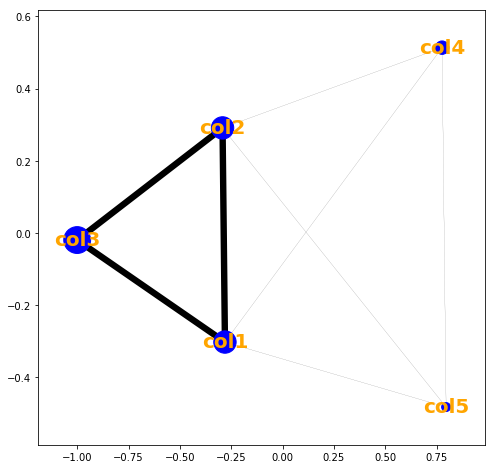

In [148]:
scn_col = scn.project('collectors')

plt.figure(figsize=(8,8))

nodes = scn_col.nodes(data='bipartite')

pos = nx.layout.spring_layout(scn_col,iterations=1000)
nx.draw_networkx_nodes(scn_col,pos, nodelist=[ n[0] for n in nodes], 
                                node_color=['b' if n[1]==0 else 'r' for n in nodes],
                                node_size=[ nx.degree(scn)[n[0]]**2*20 for n in nodes ])

nx.draw_networkx_labels(scn_col,pos, font_color='orange', font_size=20, font_weight='bold')
nx.draw_networkx_edges(scn_col,pos,width=[ c**3*0.1 for u,v,c in scn_col.edges(data='weight') ])

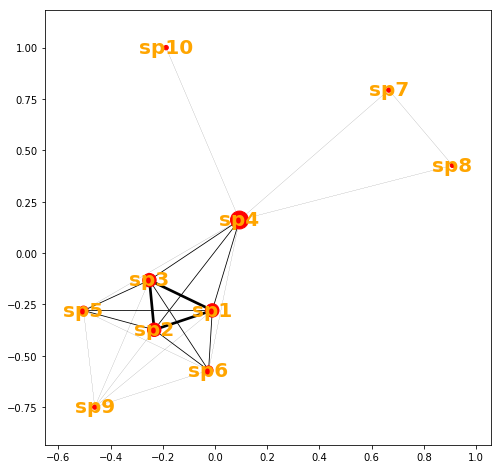

In [143]:
scn_spp = scn.project('species')

plt.figure(figsize=(8,8))

nodes = scn_spp.nodes(data='bipartite')

pos = nx.layout.spring_layout(scn_spp,iterations=1000)
nx.draw_networkx_nodes(scn_spp,pos, nodelist=[ n[0] for n in nodes], 
                                node_color=['b' if n[1]==0 else 'r' for n in nodes],
                                node_size=[ nx.degree(scn)[n[0]]**2*20 for n in nodes ])

nx.draw_networkx_labels(scn_spp,pos, font_color='orange', font_size=20, font_weight='bold')
nx.draw_networkx_edges(scn_spp,pos,width=[ c**3*0.1 for u,v,c in scn_spp.edges(data='weight') ])

In [152]:
nx.write_gexf(scn,'scn.gexf')
nx.write_gexf(scn_col,'scn_col.gexf')
nx.write_gexf(scn_spp,'scn_spp.gexf')

In [156]:
cols,spp,m = scn._getBiadjMatrix()

In [159]:
cols,spp,m

(['col1', 'col2', 'col3', 'col4', 'col5'],
 ['sp1', 'sp10', 'sp2', 'sp3', 'sp4', 'sp5', 'sp6', 'sp7', 'sp8', 'sp9'],
 <5x10 sparse matrix of type '<class 'numpy.int64'>'
 	with 21 stored elements in Compressed Sparse Row format>)

In [158]:
m.todense()

matrix([[1, 0, 1, 1, 2, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 0, 1, 0, 0, 0],
        [1, 0, 2, 1, 0, 1, 1, 0, 0, 3],
        [0, 0, 0, 0, 1, 0, 0, 4, 1, 0],
        [0, 1, 0, 0, 3, 0, 0, 0, 0, 0]], dtype=int64)

In [160]:
scn._buildBiadjMatrix(col_sp_order=( ['col1','col2','col3','col4','col5'],['sp1','sp2','sp3','sp4','sp5','sp6','sp7','sp8','sp9','sp10'] ))

In [161]:
cols,spp,m = scn._getBiadjMatrix()

In [162]:
cols,spp,m

(['col1', 'col2', 'col3', 'col4', 'col5'],
 ['sp1', 'sp2', 'sp3', 'sp4', 'sp5', 'sp6', 'sp7', 'sp8', 'sp9', 'sp10'],
 <5x10 sparse matrix of type '<class 'numpy.int64'>'
 	with 21 stored elements in Compressed Sparse Row format>)

In [163]:
m.todense()

matrix([[1, 1, 1, 2, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
        [1, 2, 1, 0, 1, 1, 0, 0, 3, 0],
        [0, 0, 0, 1, 0, 0, 4, 1, 0, 0],
        [0, 0, 0, 3, 0, 0, 0, 0, 0, 1]], dtype=int64)